# Assessment problem answers

This notebook shows the answers to the assessment problems described in the problems.md file within this repository. All the code shown in this document was done by Guillermo Martín, with relevant references indicated across the notebooks

In [36]:
# We load all necessary packages (and only allowed ones) to answer the problems stated here: 
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pandas as pd
matplotlib.style.use('ggplot') # This line is used to mimic the R ggplot package for plotting styles

## Problem 1: Extending the Lady Tasting Tea

In [ ]:
# Defining the variables under consideration
total_cups = 12
labels = list(range(total_cups))
tea_cups = 8 
milk_cups = 4  

#We can calculate the number of way a milk or tea cup could be selected from the total number of cups
milk_first = math.comb(total_cups,milk_cups) #1/495 chance of selecting milk first
tea_first = math.comb(total_cups,tea_cups)

#Potential combinations
milk_combs = list(itertools.combinations(labels,milk_cups))
tea_combs = list(itertools.combinations(labels,tea_cups))

## Problem 2: Normal Distribution

**Objective**: 

In [38]:
# The problem did not specify the mean (loc) or standard deviation (scale; std) of the normal distribution,
# but just the size of it. We follow the help guide of the np.random.normal
# https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html
# We are thus generating 100000 samples (sets) with 10 values within each. 
samples = np.random.normal(size=(100000, 10))

In [37]:
# We know have to compute the sample and population standard deviation for each sample 
# We do this by using the np.std() function, and the ddof parameter to distinguish between
# population (ddof=0) and sample (ddof=1) standard deviation. 

# Importantly though,we need to specify that we want both std for each of our sampled, 
# not for the flattened array, as specified https://numpy.org/doc/2.3/reference/generated/numpy.std.html

pop_std = np.std(samples,axis=1,ddof=0)
smp_std = np.std(samples,axis=1,ddof=1)

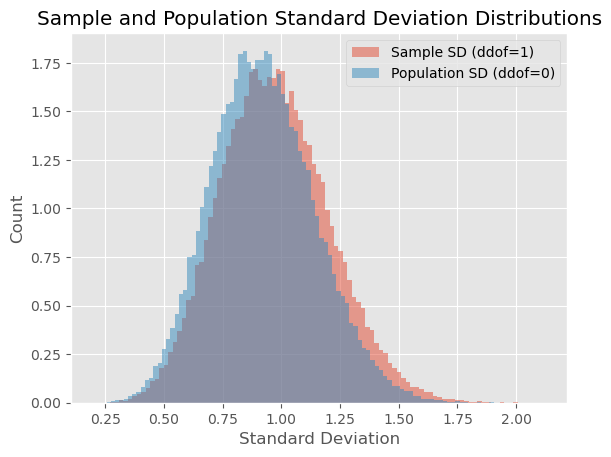

In [ ]:
fig, ax = plt.subplots() # Create an empty figure
ax.hist(smp_std, bins=100, alpha=0.5, label='Sample SD (ddof=1)', density=True) #histogram of smp_std over the created plot
ax.hist(pop_std, bins=100, alpha=0.5, label='Population SD (ddof=0)', density=True) #histogram of smp_std over the created plot
ax.set_xlabel("Standard Deviation") # x-axis title
ax.set_ylabel("Density") # y-axis title
ax.set_title("Sample and Population Standard Deviation Distributions") # plot title
ax.legend()
plt.show()

## Problem 3: t-Tests

**Objective**: 

In [2]:
# First we define our parameters
mu = np.arange(0, 1.1, 0.1) # mean values from 0 to 1 in steps of 0.1
sigma = 1 # standard deviation
n = 1000 # number of simulations

In [17]:
# We define two empty lists to store the t-statistic and p-value results
# We then loop over the number of simulations (n) and the mean values (mu)
# For each combination, we generate two samples of size 100 from normal distributions (rn, sn)
# Finally we store the values of the t_statistic and the p_value
t_stat = []
p_val = []
for i in range(n): 
    for m in mu:
         rn = np.random.normal(loc=m, scale=sigma, size=100) 
         sn = np.random.normal(loc=0, scale=1, size=100) # The standard normal distribution has mean 0 and std 1: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php
         t, p = stats.ttest_ind(rn, sn) # Perform the t-test on the two samples 
         t_stat.append(t) # Store the t-statistic and p-value in the respective lists
         p_val.append(p)

# We can now create a data.frame that contains, the mean of the normal distribution and the values 
# of the t statistic and associated p_value. 
# np.tile() repeats our array mu a 1000 times. 
df = pd.DataFrame({'mu': np.tile(mu, n), 't_stat': t_stat, 'p_val': p_val}).reset_index()

In [25]:
# Now we calculate the number of times thay p_val is above 0.05 for each value of mu (groupby)
prop_df = df.groupby('mu').agg({
    'p_val': (lambda x: (np.sum(x >= 0.05)/n))
    }).rename(columns={"p_val": 'prop_false'}).reset_index() #We rename the calculated column to

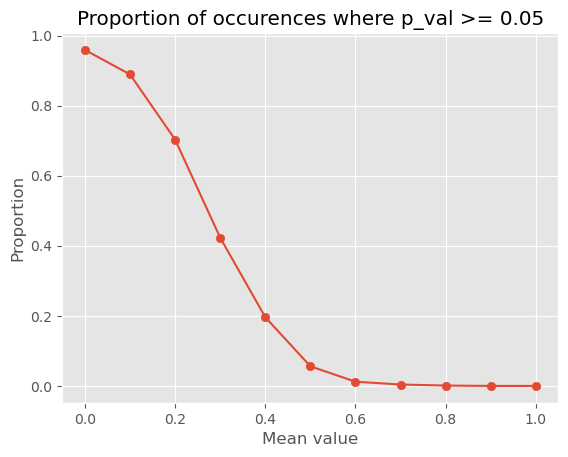

In [27]:
# Now we can plot our mean values against the proportion of times we do not reject the null hypothesis.
fig, ax = plt.subplots() # Create an empty figure
ax.scatter(prop_df['mu'],prop_df['prop_false'])
ax.plot(prop_df['mu'],prop_df['prop_false'])
ax.set_xlabel("Mean value") # x-axis title
ax.set_ylabel("Proportion") # y-axis title
ax.set_title("Proportion of occurences where p_val >= 0.05")
plt.show()


## Problem 4: ANOVA

**Objective**: 

In [8]:
# First we generate three independent samples 
mu = [0,0.5,1] #mean values
sigma = 0.5 # standard deviation
sample = [] # list to store the samples

for i in mu: 
    s = np.random.normal(loc=i, scale=sigma, size=30)
    sample.append(s)

In [ ]:
# Perform one-way ANOVA over the three samples in the 'sample' list
f_stat, p_value = stats.f_oneway(*sample) # I use * to unpack the list into separate arguments
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4g}")

ANOVA F-statistic: 15.1428, p-value: 2.275e-06


In [ ]:
# Next, we will perform independent t-tests between each pair of samples in the 'sample' list.append
# First we generate the potential pairs of samples to compare   
pairs = [(0, 1), (0, 2), (1, 2)]
for a, b in pairs:
    t_stat, p_val = stats.ttest_ind(sample[a], sample[b]) # perform t-test for each pair 
    print(f"t-test sample[{a}] vs sample[{b}]: t-stat={t_stat:.4f}, p-value={p_val:.4g}") # Print the value of the t-statistic and p-value
 
#A nicer way to generate pairs of samples would be to use the combinations functions from the itertools package. 
# Not really necessary here, as we only had three potential combinations. 
#from itertools import combinations
#pairs = list(combinations(range(len(sample)), 2))
#print(pairs)


t-test sample[0] vs sample[1]: t-stat=-3.3969, p-value=0.001237
t-test sample[0] vs sample[2]: t-stat=-5.6714, p-value=4.714e-07
t-test sample[1] vs sample[2]: t-stat=-1.9105, p-value=0.06101
